**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


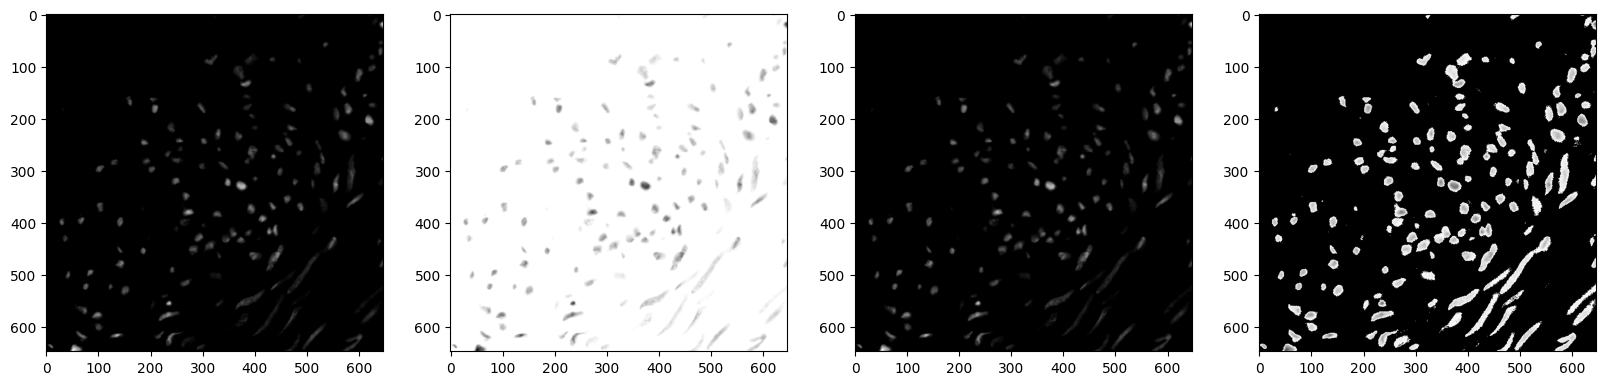

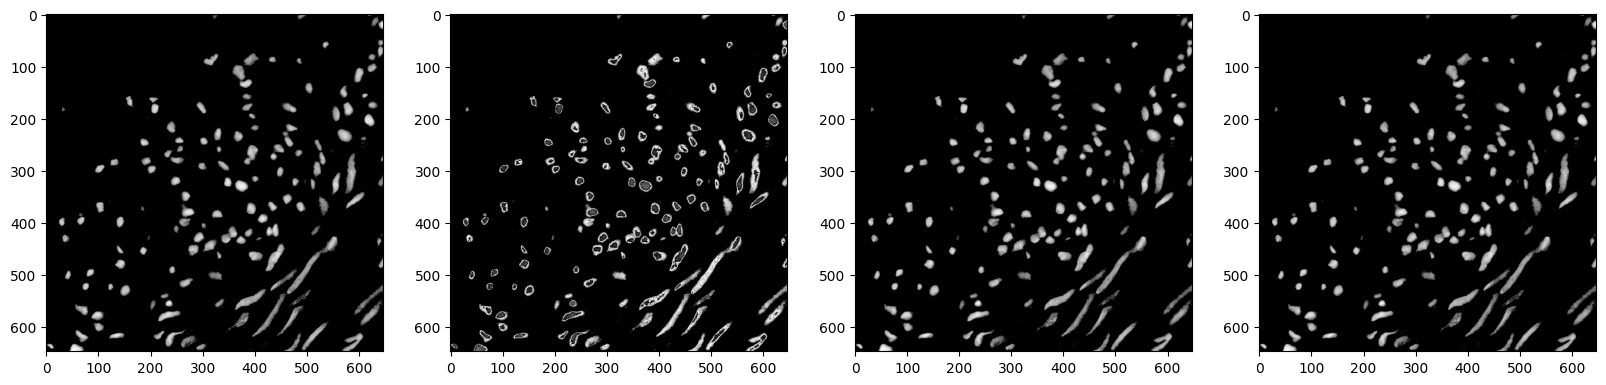

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
imgNegativa = 255-img
imgPositiva = abs(255-imgNegativa)
imgPositivaPlus = (imgNegativa-255)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(imgNegativa, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(imgPositiva, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(imgPositivaPlus, cmap='gray')
plt.show()

"""Dentre as imagens geradas, a original((fundo preto e céluas brancas)) é mais visível para mim, os contornos brancos oferecem um contraste mais perceptível ao olho do que os contornos cinza claro no fundo branco. Dito isso, enquanto testava as imagens fui capaz de produzir uma imagem com contraste considerávelmente mais elevado e que realça muito bem a separação entre as células e o fundo ((quarta imagem, imgPositivaPlus))"""

#Contraste = 30
imgLog = np.uint8(10 * np.log2(img + 1))
imgLog2 = np.uint8(50 * np.log2(img + 1))
imgLog3 = np.uint8(10 * np.log10(img + 1))
imgLog4 = np.uint8(50 * np.log10(img + 1))



plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(imgLog, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(imgLog2, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(imgLog3, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(imgLog4, cmap='gray')
plt.show()

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



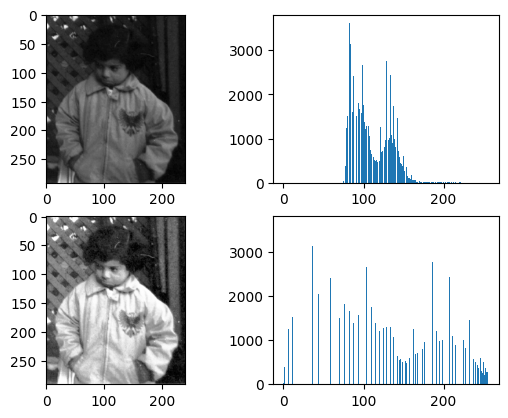

In [7]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

# inicializando tudo:
img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
rows = len(img)
cols = len(img[0])
# criando o histograma:
hist = np.zeros(256)
for i in range(rows):
    for j in range(cols):
        hist[img[i][j]] += 1
        
# equalizando:
levels = 256-1
total_px = rows*cols
# calculo da fdp:
probs = hist/total_px

# calculo da cdf:
cdfs = np.cumsum(probs)

# novo assign de niveis:
new_levels = cdfs * levels

# ajustando a imagem com base na equalizacao:
img_eq = img.copy()
img_eq = new_levels[img]

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(2,2,2)
plt.hist(img.flatten(), bins=256, range=[0, 256]) #Flatten transforma 2d em 1d
plt.subplot(2,2,3)
plt.imshow(img_eq, cmap='gray')
plt.subplot(2,2,4)
plt.hist(img_eq.flatten(), bins=256, range=[0, 256])
plt.show()

# mostrar a curva de transformacao?


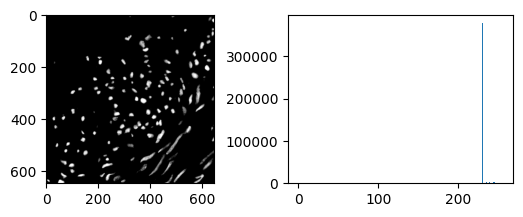

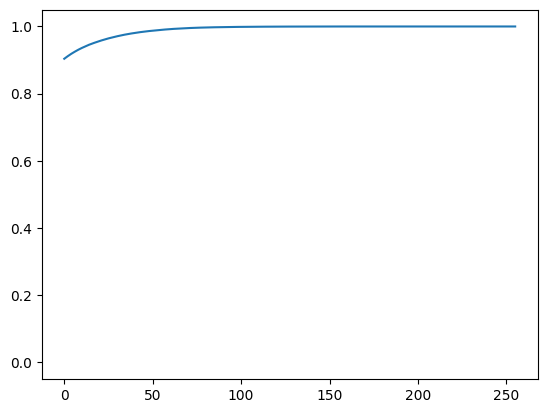

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
rows = len(img)
cols = len(img[0])


# criando o histograma:
hist = np.zeros(256)
for i in range(rows):
    for j in range(cols):
        hist[img[i][j]] += 1
        
# equalizando:
levels = 256-1
total_px = rows*cols
# calculo da fdp:
probs = hist/total_px

# calculo da cdf:
cdfs = np.cumsum(probs)

# criando novo hist:
new_hist = np.zeros(rows)

# novo assign de niveis:
new_levels = cdfs * levels
for index,i in enumerate(new_levels):
    new_hist[int(i)] += hist[index]

# ajustando a imagem com base na equalizacao:
img_eq = img.copy()
for i in range(256):
    img_eq[img == i] = new_levels[i]

plt.subplot(2,2,1)
plt.imshow(img_eq, cmap='gray')
plt.subplot(2,2,2)
plt.hist(img_eq.flatten(), bins=256, range=[0, 256])
plt.show()

plt.plot(range(256), cdfs)
plt.plot(0, 0)
plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

256
[[230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 ...
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]]
256
[[230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 ...
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]
 [230 230 230 ... 230 230 230]]


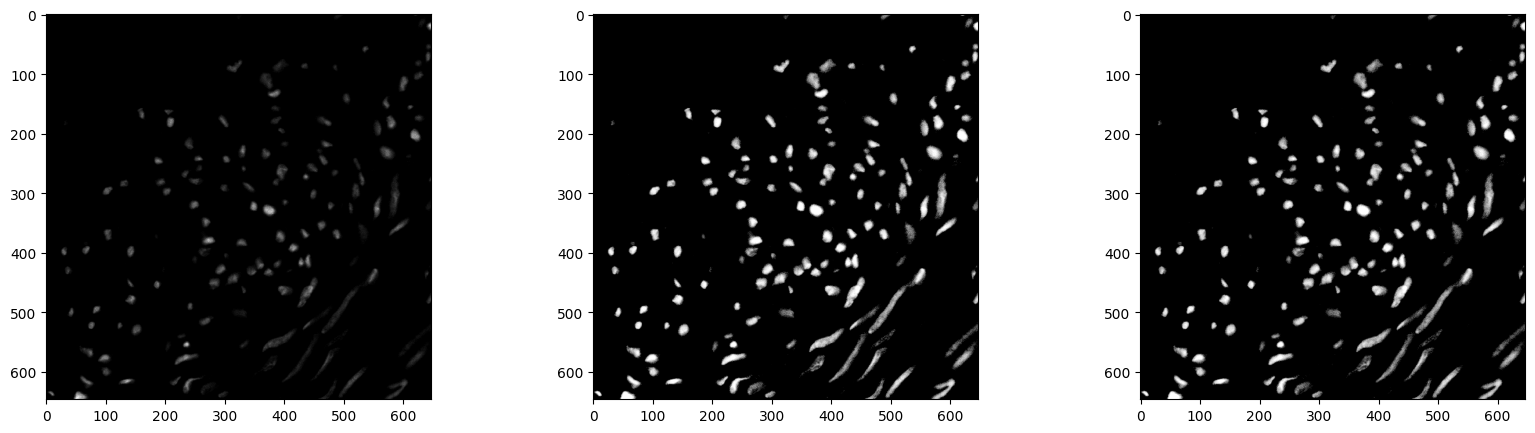

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img_cells = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

def equalize_histogram(img):
    # calculando o histograma
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    probs = hist / img.size

    # calculando a CDF
    cdf = probs.cumsum()


    new_levels = np.uint8(cdf * 255)
    img_eq = new_levels[img]
    
    return img_eq

# aplicando a equalização 1 vez
img_eq_1 = equalize_histogram(img_cells)

# aplicando a equalização 2 vezes
img_eq_2 = equalize_histogram(img_eq_1)

# Plotando os resultados
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_cells, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img_eq_1, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img_eq_2, cmap='gray')
plt.show()
